In [110]:
# Importing the required libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
warnings.filterwarnings('ignore')

In [78]:
# loading the data
cen=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
cen.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
cen.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Exploratory Data Analysis

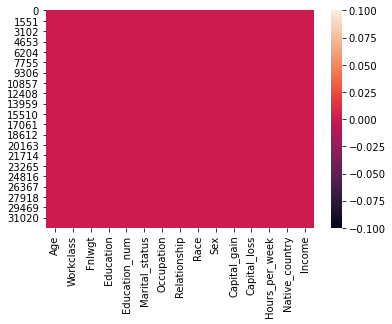

In [6]:
sns.heatmap(cen.isnull())
plt.show()

There are no null values.

In [7]:
cen.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
cen['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

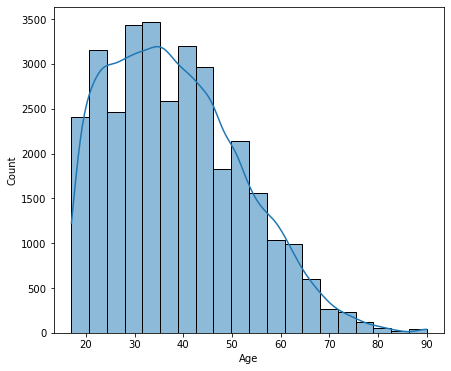

In [10]:
plt.figure(figsize=(7,6))
sns.histplot(x='Age',data=cen,kde=True,bins=20)
plt.show()

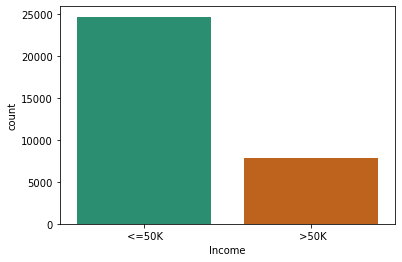

In [11]:
sns.countplot(x='Income', data=cen,palette='Dark2')
plt.show()

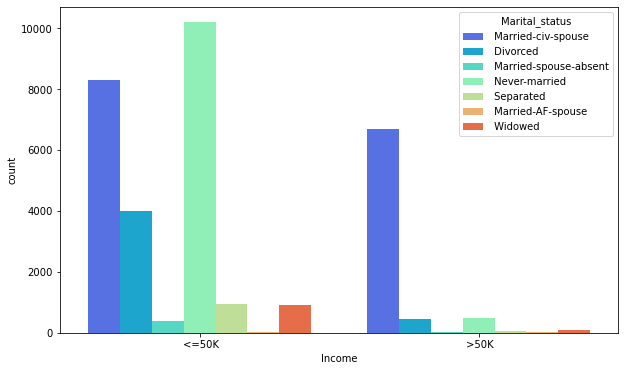

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='Marital_status', data=cen,palette='rainbow')
plt.show()

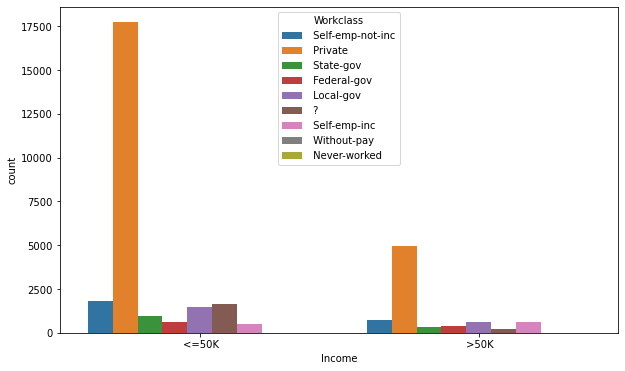

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='Workclass', data=cen)
plt.show()

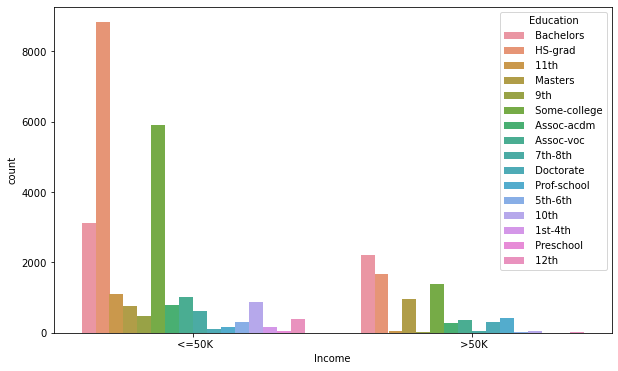

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='Education', data=cen)
plt.show()

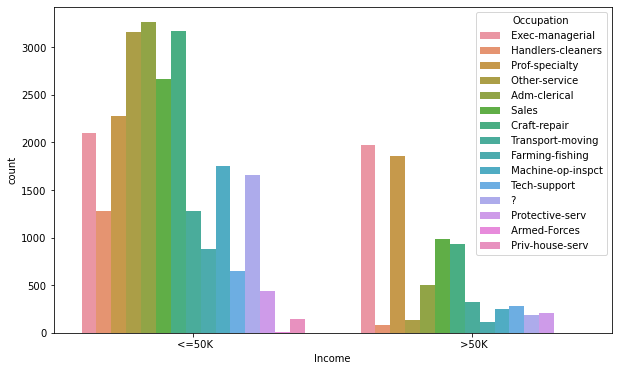

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='Occupation', data=cen)
plt.show()

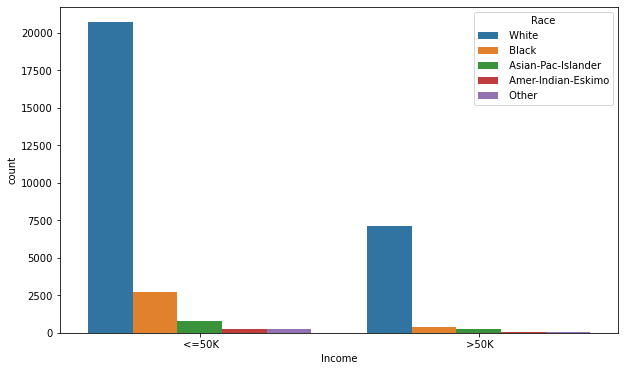

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='Race', data=cen)
plt.show()

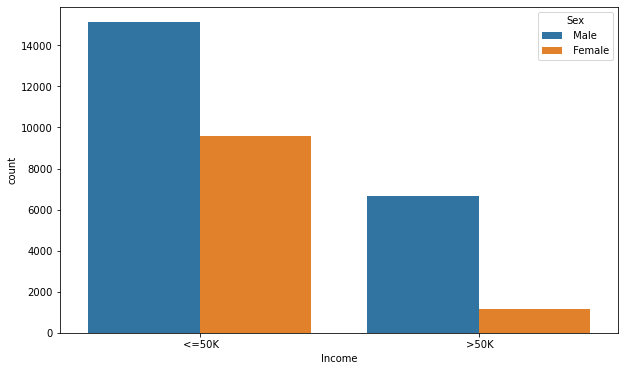

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income', hue='Sex', data=cen)
plt.show()

# Removing Outliers

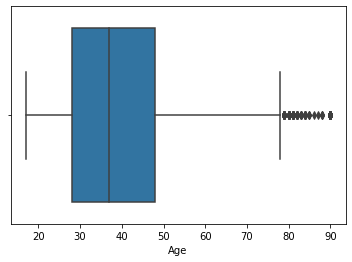

In [28]:
sns.boxplot(x='Age',data=cen)
plt.show()

In [52]:
threshold=3
z=np.absolute(zscore(cen['Age']))
z
z1=np.where(z>3)
list_=[]
for i in z1:
    pass

In [79]:
cen_new=cen.drop(i)

In [80]:
print('Data loss: ',(cen.shape[0] - cen_new.shape[0]) * 100 / cen.shape[0],"%")

Data loss:  0.3716216216216216 %


In [62]:
# filling the question mark in Workclass
cen['Workclass'].mode()


0     Private
dtype: object

In [81]:
Workclass=[]
for col in cen_new['Workclass']:
    if col == ' ?':
        Workclass.append(col.replace('?','Private'))
    else:
        Workclass.append(col)

In [82]:
cen_new["workclass"]=Workclass
cen_new.head()
cen_new.drop('Workclass',inplace=True,axis=1)

In [83]:
print(cen_new['workclass'].unique())
cen_new.head()

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,workclass
0,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc
1,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private
2,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private
3,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private
4,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Private


# Converting Categorical Variables to Numeric

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cen_new.columns:
    if cen_new[i].dtype==object:
        cen_new[i]=le.fit_transform((cen_new[i].astype(str)))

In [85]:
cen_new.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,workclass
0,50,83311,9,13,2,4,0,4,1,0,0,13,39,0,5
1,38,215646,11,9,0,6,1,4,1,0,0,40,39,0,3
2,53,234721,1,7,2,6,0,2,1,0,0,40,39,0,3
3,28,338409,9,13,2,10,5,2,0,0,0,40,5,0,3
4,37,284582,12,14,2,4,5,4,0,0,0,40,39,0,3


# Spliting the Data into features  and Vectors

In [97]:
x=cen_new.drop('Income',axis=1)
y=cen_new['Income']

In [102]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 47)

**LogisticRegression**

In [103]:
log = LogisticRegression()
log.fit(xtrain , ytrain)
pred_l = log.predict(xtest)
acc_l = accuracy_score(ytest , pred_l)*100
print('Accuracy Score: ',acc_l,'%\n\n')
print(confusion_matrix(ytest , pred_l),'\n\n')
print(classification_report(ytest , pred_l))

Accuracy Score:  78.02096177558569 %


[[4612  305]
 [1121  450]] 


              precision    recall  f1-score   support

           0       0.80      0.94      0.87      4917
           1       0.60      0.29      0.39      1571

    accuracy                           0.78      6488
   macro avg       0.70      0.61      0.63      6488
weighted avg       0.75      0.78      0.75      6488



**RandomForestClassifier**

In [106]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(xtrain, ytrain)
pred_r = random_forest.predict(xtest)
acc_r = accuracy_score(ytest , pred_r)*100
print('Accuracy Score: ',acc_r,'%\n\n')
print(confusion_matrix(ytest , pred_r),'\n\n')
print(classification_report(ytest , pred_r))

Accuracy Score:  85.74290998766955 %


[[4623  294]
 [ 631  940]] 


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4917
           1       0.76      0.60      0.67      1571

    accuracy                           0.86      6488
   macro avg       0.82      0.77      0.79      6488
weighted avg       0.85      0.86      0.85      6488



**KNeighborsClassifier**

In [107]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(xtrain, ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)*100
print('Accuracy Score: ',acc_knn,'%\n\n')
print(confusion_matrix(ytest , pred_knn),'\n\n')
print(classification_report(ytest , pred_knn))

Accuracy Score:  78.1596794081381 %


[[4705  212]
 [1205  366]] 


              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4917
           1       0.63      0.23      0.34      1571

    accuracy                           0.78      6488
   macro avg       0.71      0.59      0.60      6488
weighted avg       0.76      0.78      0.74      6488



**MultinomialNB**

In [111]:
multinomial = MultinomialNB()
multinomial.fit(xtrain, ytrain)
pred_mn =multinomial.predict(xtest)
acc_mn = accuracy_score(ytest , pred_mn)*100
print('Accuracy Score: ',acc_mn,'%\n\n')
print(confusion_matrix(ytest , pred_mn),'\n\n')
print(classification_report(ytest , pred_mn))

Accuracy Score:  77.29654747225648 %


[[4682  235]
 [1238  333]] 


              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4917
           1       0.59      0.21      0.31      1571

    accuracy                           0.77      6488
   macro avg       0.69      0.58      0.59      6488
weighted avg       0.74      0.77      0.73      6488



**DecisionTreeClassifier**

In [112]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(xtrain, ytrain)
pred_dt =decisiontree.predict(xtest)
acc_dt = accuracy_score(ytest , pred_dt)*100
print('Accuracy Score: ',acc_dt,'%\n\n')
print(confusion_matrix(ytest , pred_dt),'\n\n')
print(classification_report(ytest , pred_dt))

Accuracy Score:  80.17879161528977 %


[[4262  655]
 [ 631  940]] 


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4917
           1       0.59      0.60      0.59      1571

    accuracy                           0.80      6488
   macro avg       0.73      0.73      0.73      6488
weighted avg       0.80      0.80      0.80      6488



# Cross validation score

In [113]:
from sklearn.model_selection import cross_val_score
#Cross Validation score for Random_forest
for j in range(2,10):
    lsscore=cross_val_score(random_forest,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_r,'\n\n')

At cv:- 2
cross validation score is:- 85.58834252257309
accuracy_score is:- 85.74290998766955 


At cv:- 3
cross validation score is:- 85.7424704830605
accuracy_score is:- 85.74290998766955 


At cv:- 4
cross validation score is:- 85.75788930993998
accuracy_score is:- 85.74290998766955 


At cv:- 5
cross validation score is:- 85.62533299549872
accuracy_score is:- 85.74290998766955 


At cv:- 6
cross validation score is:- 85.77640182839859
accuracy_score is:- 85.74290998766955 


At cv:- 7
cross validation score is:- 85.75481111988397
accuracy_score is:- 85.74290998766955 


At cv:- 8
cross validation score is:- 85.56984029413034
accuracy_score is:- 85.74290998766955 


At cv:- 9
cross validation score is:- 85.65928099272926
accuracy_score is:- 85.74290998766955 




In [114]:
lsscore_selected =cross_val_score(random_forest,x,y,cv=3).mean()
print('The cv Score is:-',lsscore_selected*100,'\nThe accuracy score is:-',acc_r)

The cv Score is:- 85.73938777397578 
The accuracy score is:- 85.74290998766955


# Conclusion

In [115]:
a=np.array(ytest)
predicted=np.array(random_forest.predict(xtest))
df_com=pd.DataFrame({'original':a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
6483,0,0
6484,0,0
6485,0,0
6486,0,0


# Saving the model

In [116]:
import pickle
filename='Census_income.pkl'
pickle.dump(random_forest,open(filename,'wb'))